In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [164]:
pd.set_option('display.max_columns', None)

In [205]:
df = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2celltrain.csv")
# holdout = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2cellholdout.csv")
# holdout set will not be used as it was not scored


In [166]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [167]:
df.shape

(51047, 58)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [169]:
df=df.set_index('CustomerID')

In [170]:
df.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [171]:
df[df.columns[df.isna().sum() > 0]].isna().sum()

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

In [172]:
df[df.columns[df.isna().sum() > 0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MonthlyRevenue         50891 non-null  float64
 1   MonthlyMinutes         50891 non-null  float64
 2   TotalRecurringCharge   50891 non-null  float64
 3   DirectorAssistedCalls  50891 non-null  float64
 4   OverageMinutes         50891 non-null  float64
 5   RoamingCalls           50891 non-null  float64
 6   PercChangeMinutes      50680 non-null  float64
 7   PercChangeRevenues     50680 non-null  float64
 8   ServiceArea            51023 non-null  object 
 9   Handsets               51046 non-null  float64
 10  HandsetModels          51046 non-null  float64
 11  CurrentEquipmentDays   51046 non-null  float64
 12  AgeHH1                 50138 non-null  float64
 13  AgeHH2                 50138 non-null  float64
dtypes: float64(13), object(1)
memory usage: 5.8+ MB


In [173]:
df[df['Handsets'].isna()]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3308798,No,76.98,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,1,MIAFTL954,NaN,NaN,NaN,0.0,0.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,2-High,Other,Other,Unknown


Where handsets is also Handsets models and current equipment days are nan. we will fill drop this observation

In [174]:
df=df.drop(index=df[df['Handsets'].isna()].index)

only serv area is caragorical with 24 NA's we will see this records

In [175]:
df[df['ServiceArea'].isna()]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3015822,No,46.10,203.0,38.0,0.00,30.0,0.0,-1.0,15.8,1.7,2.3,5.7,0.0,0.0,80.1,18.3,19.0,51.3,34.3,4.0,0.0,0.0,35,2,2,NaN,2.0,2.0,7.0,40.0,36.0,Yes,No,No,Yes,Yes,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,1-Highest,Other,Crafts,Yes
3022406,Yes,53.01,461.0,30.0,1.49,28.0,0.0,223.0,29.0,6.0,1.7,38.7,0.0,1.3,64.3,6.0,1.3,86.7,60.3,7.7,0.0,0.7,32,1,1,NaN,2.0,2.0,272.0,36.0,0.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,5,No,0,30,No,3-Good,Other,Other,Yes
3047802,Yes,61.45,950.0,45.0,0.00,91.0,0.7,218.0,2.6,9.3,23.0,76.7,7.0,0.0,158.3,59.3,13.7,153.7,162.3,32.3,0.0,3.3,27,5,4,NaN,2.0,2.0,132.0,48.0,48.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,9,No,0,30,No,1-Highest,Rural,Professional,Yes
3073410,Yes,109.29,1000.0,60.0,4.95,135.0,0.0,520.0,79.9,6.3,28.3,10.0,0.0,0.3,301.9,69.0,15.0,106.0,132.7,34.7,0.0,2.7,23,3,3,NaN,1.0,1.0,696.0,52.0,48.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,No,Yes,Yes,Yes,0,0,No,Yes,0,9,No,0,Unknown,No,1-Highest,Town,Professional,Yes
3082514,No,76.52,441.0,73.0,0.25,22.0,6.0,-163.0,-34.3,15.7,3.3,22.7,1.3,0.3,59.0,13.0,0.0,80.7,46.7,19.0,0.0,1.0,26,1,1,NaN,2.0,1.0,445.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,4-Medium,Other,Other,Unknown
3100222,No,79.92,318.0,75.0,0.99,0.0,0.0,-112.0,-0.7,2.7,2.0,23.3,0.0,0.0,79.4,17.0,4.7,63.7,13.7,4.7,0.0,0.3,20,5,4,NaN,2.0,2.0,600.0,42.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,9,No,0,60,No,1-Highest,Other,Other,No
3101758,Yes,17.90,191.0,10.0,0.25,14.0,0.0,-63.0,-3.7,0.7,0.0,17.0,1.3,0.0,14.6,15.3,1.7,49.3,32.7,0.7,0.0,0.0,20,2,2,NaN,2.0,2.0,346.0,24.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,5,No,0,60,No,2-High,Other,Other,Unknown
3109742,Yes,68.75,635.0,42.0,0.00,85.0,0.0,-75.0,-41.0,3.3,5.0,24.0,2.7,0.0,95.0,50.7,18.7,134.3,94.7,8.3,0.0,1.7,19,1,1,NaN,1.0,1.0,588.0,50.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,5,No,0,Unknown,No,2-High,Rural,Other,Unknown
3126878,No,34.83,297.0,30.0,0.00,13.0,0.1,86.0,13.0,1.3,0.0,10.0,0.0,0.0,49.3,6.7,0.0,80.7,7.7,1.3,0.0,0.3,19,1,1,NaN,2.0,1.0,204.0,44.0,40.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,6,No,0,60,No,2-High,Suburban,Professional,Yes


data is ok so service area will be replaced with 'unknown' because its still an information

In [176]:
df['ServiceArea']=df['ServiceArea'].fillna('Unknown')

In [177]:
df[df['AgeHH1'].isna() & df['AgeHH2'].isna()].shape[0]

909

AGEHH1 and AGEHH2 are always NA at the same time. Only 909 cases so we will imput it with mean

In [178]:
df['AgeHH1']=df['AgeHH1'].fillna(df['AgeHH1'].mean())
df['AgeHH2']=df['AgeHH2'].fillna(df['AgeHH2'].mean())

In [179]:
def count_zeros(df):
    """
    This function counts the number of zeros in each numeric column of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series containing the count of zeros for each numeric column.
    """
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[int, float])
    
    # Count zeros in each numeric column
    zero_counts = (numeric_cols == 0).sum()
    
    return zero_counts

we will check for 0 values amount in the data 

In [180]:
count_zeros(df)

MonthlyRevenue                   6
MonthlyMinutes                 722
TotalRecurringCharge           160
DirectorAssistedCalls        24511
OverageMinutes               23261
RoamingCalls                 34946
PercChangeMinutes             1123
PercChangeRevenues            5817
DroppedCalls                  7737
BlockedCalls                 13911
UnansweredCalls               4989
CustomerCareCalls            28019
ThreewayCalls                37132
ReceivedCalls                 6336
OutboundCalls                 6427
InboundCalls                 14998
PeakCallsInOut                4223
OffPeakCallsInOut             4546
DroppedBlockedCalls           5792
CallForwardingCalls          50812
CallWaitingCalls             25028
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                      39
Handsets                         0
HandsetModels                    0
CurrentEquipmentDays            22
AgeHH1                       13916
AgeHH2              

AgeHH1 and AgeHH2 cols dropeed because of unnatural amount of zeros as the value stands for age

In [181]:
df=df.drop(columns=['AgeHH1','AgeHH2'])

In [182]:
df[df.columns[df.isna().sum() > 0]].isna().sum()

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
dtype: int64

use knn imputer to imput missing values for the rest of columns

In [183]:
def find_optimal_k(df, max_k=10):
    """
    Use the elbow method to find the optimal number of clusters (k) for k-means clustering.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    max_k (int): The maximum number of clusters to try.

    Returns:
    int: The optimal number of clusters.
    """
    # Ensure the DataFrame is numeric
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Fill missing values with column means temporarily for clustering
    imputer = SimpleImputer(strategy='mean')
    temp_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    
    # Calculate inertia for different values of k
    inertia = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(temp_df)
        inertia.append(kmeans.inertia_)
    
    # Plot the inertia
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bo-', markersize=8)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    # Identify the elbow point
    # This is a simple heuristic; more advanced methods can be used for better results.
    optimal_k = np.argmax(np.diff(inertia)) + 1
    return optimal_k

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

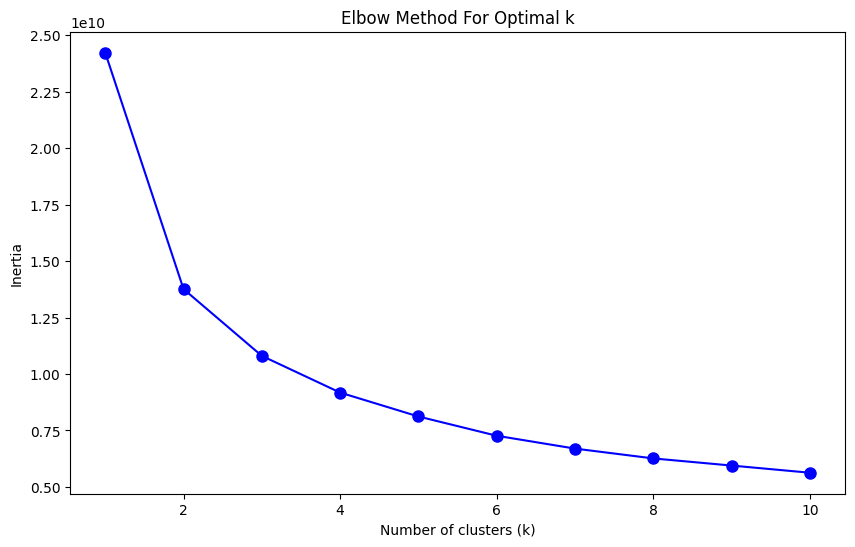

8

In [184]:
find_optimal_k(df)

In [185]:
def kmeans_impute(df, k):
    """
    Impute missing values in a DataFrame using k-means clustering.

    Parameters:
    df (pd.DataFrame): The input DataFrame with missing values.
    k (int): The number of clusters for k-means.

    Returns:
    pd.DataFrame: The DataFrame with missing values imputed.
    """
    # Ensure the DataFrame is numeric
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Fill missing values with column means temporarily for clustering
    imputer = SimpleImputer(strategy='mean')
    temp_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(temp_df)
    temp_df['Cluster'] = clusters
    
    # Impute missing values based on cluster means
    for col in numeric_df.columns:
        for cluster in range(k):
            cluster_mean = temp_df[temp_df['Cluster'] == cluster][col].mean()
            df.loc[(temp_df['Cluster'] == cluster) & (df[col].isna()), col] = cluster_mean

    return df

using elbow method i will use k of 4

In [187]:
df=kmeans_impute(df,4)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [188]:
df[df.columns[df.isna().sum() > 0]].isna().sum()

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
dtype: int64

In [ ]:
df[df['MonthlyRevenue'].isna()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
51046,3399994.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7,0.7,117.3,1.3,1.0,330.9,55.0,16.7,442.3,167.3,19.3,0.0,0.0,25.0,1.0,1.0,NEVPOW619,7.0,5.0,75.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,2.0,1.0,No,No,0.0,0.0,No,1.0,60,Yes,5-Low,Other,Other,Unknown


there is just 1 bad quality observation left, we will drop it

In [190]:
df=df.dropna()

## Exploratory analysis

In [192]:
df.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,50679.0000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000
mean,58.8893,526.452002,46.912528,0.896948,40.046153,1.235109,-11.548136,-1.192009,6.025261,4.101940,28.372697,1.875321,0.299619,115.156820,25.452497,8.208958,90.807765,67.847292,10.188273,0.012366,1.847323,18.699323,1.531344,1.353795,1.804969,1.558594,379.222518,0.035419,0.018213,0.052191,4.324849,0.053592
std,44.5110,530.026969,23.825274,2.232152,96.676502,9.816634,257.517308,39.575305,9.045400,10.969226,38.919152,5.107381,1.169626,166.636769,35.203720,16.699393,104.900845,92.802309,15.572147,0.596321,5.600445,9.748525,1.225751,0.675793,1.330564,0.906124,252.041016,0.201587,0.142300,0.308238,3.137083,0.382137
min,-6.1700,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.6700,159.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.500000,3.300000,0.000000,23.300000,11.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.5500,367.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,53.200000,13.700000,2.000000,62.300000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,71.1000,724.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.700000,1.700000,0.300000,154.100000,34.000000,9.300000,121.700000,89.000000,12.700000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,513.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.3800,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [195]:
df['Churn'].value_counts()/df['Churn'].count()

Churn
No     0.713826
Yes    0.286174
Name: count, dtype: float64

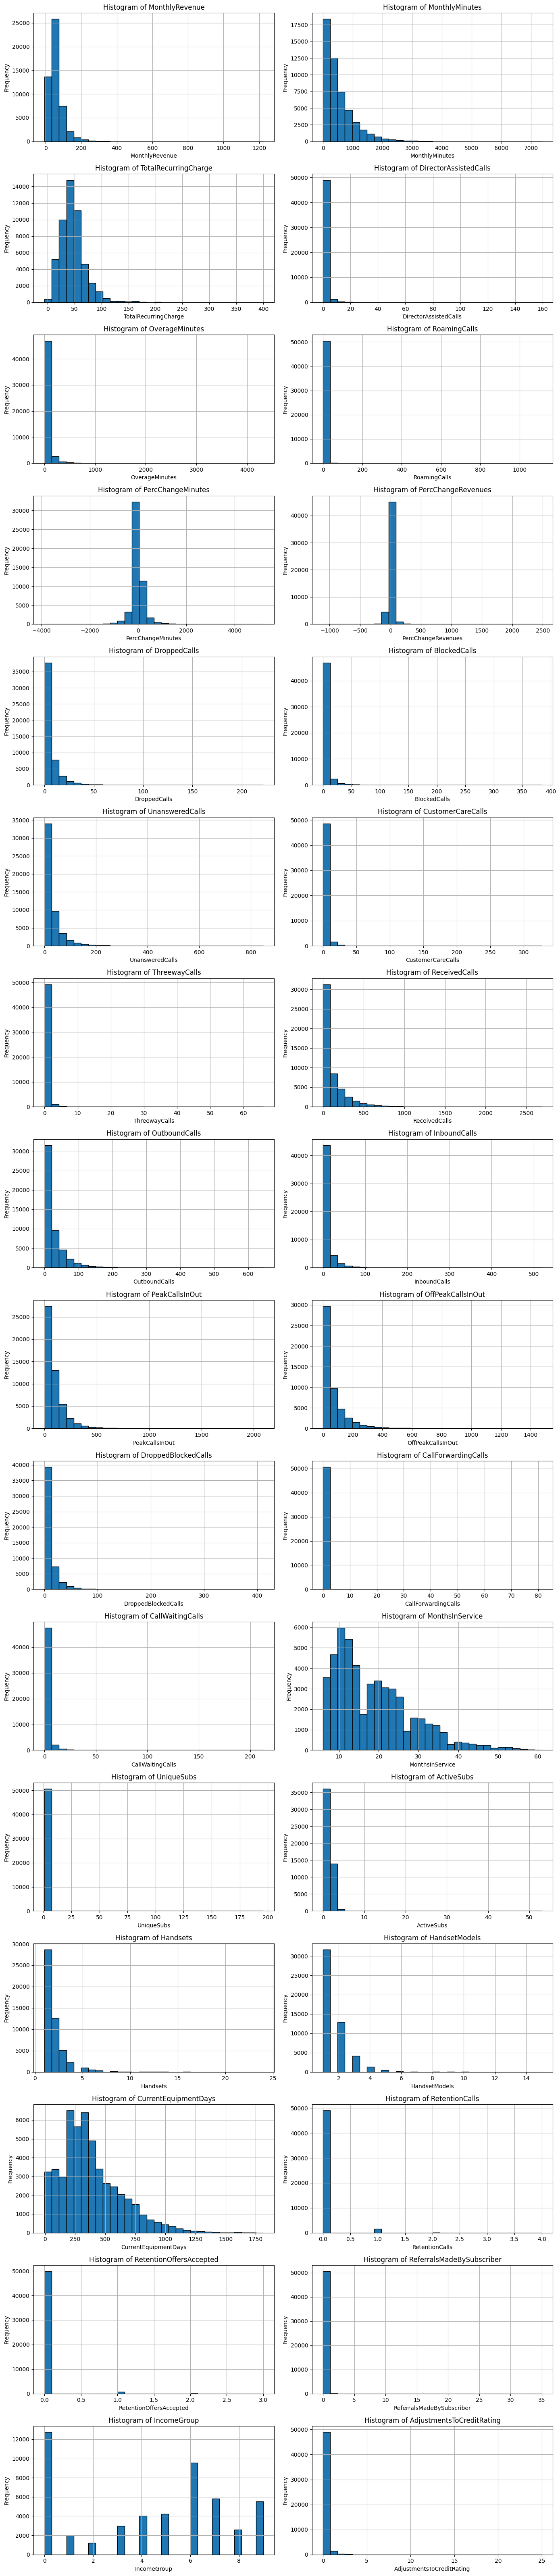

In [197]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up the figure and axes for 2 columns
num_cols = 2
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    df[col].plot(kind='hist', bins=30, edgecolor='black', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

IncomeGroup is categorical column, shouldnt be analyzed here

In [201]:
list(categorical_cols)

['Churn',
 'ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

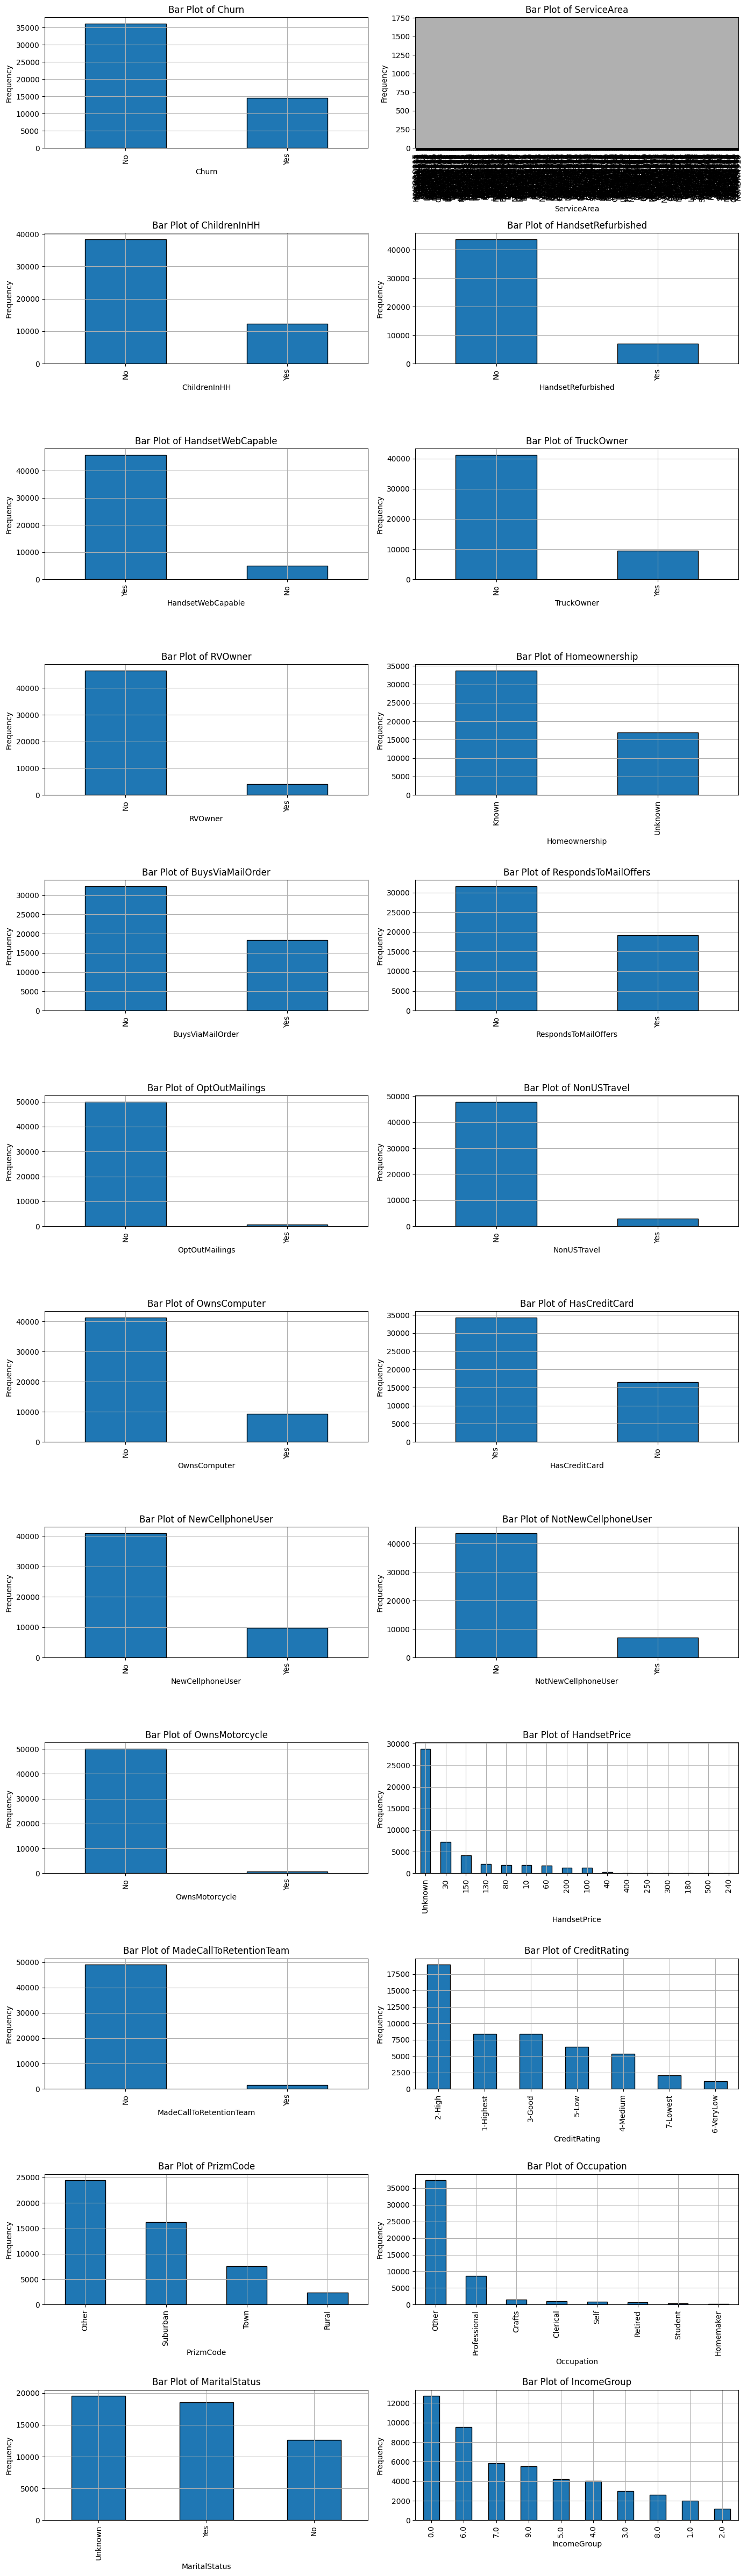

In [203]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Add 'IncomeGroup' to the list of categorical columns if it's not already included
if 'IncomeGroup' not in categorical_cols:
    categorical_cols.append('IncomeGroup')

# Set up the figure and axes for 2 columns
num_cols = 2
num_plots = len(categorical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'Bar Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Modeling